In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

<h1>Hpg Store Info DB from csv</h1>

In [17]:
df = pd.read_csv("../input/hpg_store_info.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
hpg_store_id      4690 non-null object
hpg_genre_name    4690 non-null object
hpg_area_name     4690 non-null object
latitude          4690 non-null float64
longitude         4690 non-null float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [19]:
df.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


In [20]:
df.isnull().values.any()

False

Data is clean and it does not contain any missing values.

<h2>Column: hpg_store_id</h2>

In [21]:
# Check if there are duplicated Store Ids

df[df.duplicated(['hpg_store_id'])]

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude


Dataset is clean and it does not contain any duplicated entry :) That's great!

<h2>Column: hpg_genre_name</h2>

In [22]:
df['hpg_genre_name'].value_counts()

Japanese style                  1750
International cuisine            700
Creation                         410
Seafood                          339
Grilled meat                     325
Italian                          249
Spain Bar/Italian Bar            229
Chinese general                   91
Japanese food in general          85
Japanese cuisine/Kaiseki          64
Karaoke                           60
Creative Japanese food            60
Shabu-shabu/Sukiyaki              59
Okonomiyaki/Monja/Teppanyaki      44
Party                             40
Korean cuisine                    38
French                            27
Steak/Hamburger/Curry             24
Bistro                            22
Cafe                              16
Sushi                             11
Pasta/Pizza                       10
Bar/Cocktail                       7
Western food                       5
Amusement bar                      5
Thai/Vietnamese food               5
Cantonese food                     4
S

<h2>Column: hpg_area_name</h2>

In [23]:
df['hpg_area_name'].value_counts()

Tōkyō-to Shinjuku-ku None                    257
Tōkyō-to Chūō-ku Ginza                       198
Hyōgo-ken Kōbe-shi None                      163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji          150
Osaka Prefecture Osaka None                  145
Hiroshima-ken Hiroshima-shi Hondōri          135
Tōkyō-to Shibuya-ku None                     127
Tōkyō-to Minato-ku Takanawa                  122
Tōkyō-to Toshima-ku None                     119
None None None                               117
Tōkyō-to Hachiōji-shi Ishikawamachi          114
Hokkaidō Sapporo-shi Minami 4 Jōnishi        110
Tōkyō-to Taitō-ku None                       100
Fukuoka-ken Fukuoka-shi None                  90
Shizuoka-ken Hamamatsu-shi Sukenobuchō        90
Tōkyō-to Chiyoda-ku None                      89
Tōkyō-to Chūō-ku None                         86
Tōkyō-to Sumida-ku Tachibana                  86
Hokkaidō Sapporo-shi None                     84
Shizuoka-ken Shizuoka-shi Hinodechō           79
Tōkyō-to Minato-ku R

<h1>New columns extension </h1>
<p>extension for air_area_name</p>
<ul>For example: Fukuoka-ken Fukuoka-shi Shiobaru 
<li>region - Fukuoka-ken</li>
<li>city - Fukuoka-shi</li>
<li>street - Shiobaru</li>
</ul>

INFO: The hpg_area_name_region column contains information about location: prefecture, capital or ward, and area. Thus we can split that information into separate columns.

In [24]:
area_split = df['hpg_area_name'].str.split(' ', expand=True)

df['region'] = area_split[0]
df['city'] = area_split[1]
df['street'] = area_split.iloc[:, 2:].apply(lambda row: ' '.join(row.dropna()), axis=1)


In [25]:
df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude,region,city,street
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to,Setagaya-ku,Taishidō
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to,Setagaya-ku,Taishidō
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to,Setagaya-ku,Taishidō
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to,Setagaya-ku,Taishidō
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to,Setagaya-ku,Taishidō


In [26]:
df['region'].value_counts()

Tōkyō-to         2076
Ōsaka-fu          514
Fukuoka-ken       380
Hyōgo-ken         331
Hokkaidō          298
Hiroshima-ken     245
Shizuoka-ken      231
Osaka             145
Niigata-ken       142
Miyagi-ken        139
None              117
Kanagawa-ken       61
Saitama-ken        11
Name: region, dtype: int64

In [27]:
print(len(df['region'].value_counts()))
print("We have %s diffrent regions in this hpg"%len(df['region'].unique()))
print(len(df['city'].value_counts()))
print("We have %s diffrent cities in this hpg"%len(df['city'].unique()))
print(len(df['street'].value_counts()))
print("We have %s diffrent streets in this hpg"%len(df['street'].unique()))

13
We have 13 diffrent regions in this hpg
72
We have 72 diffrent cities in this hpg
101
We have 101 diffrent streets in this hpg


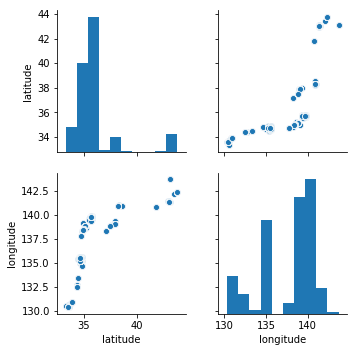

In [28]:
sns.pairplot(df)